In [2]:
import json
import pandas as pd

flights_json = json.load(open('flights.json'))
flights_json.keys()

dict_keys(['airportsFields', 'airlineFields', 'airports', 'airlines', 'routes'])

## Airports

In [3]:
import geopandas as gpd
airports = pd.DataFrame(flights_json["airports"], columns = flights_json["airportsFields"])
airports["airportId"] = range(1, len(airports) + 1)
airports_gdf = gpd.GeoDataFrame(airports, geometry=gpd.points_from_xy(airports.longitude, airports.latitude), crs="EPSG:4326")
airports.head()

,name,city,country,longitude,latitude,airportId
0,Goroka,Goroka,Papua New Guinea,145.391881,-6.081689,1
1,Madang,Madang,Papua New Guinea,145.788700,-5.207083,2
2,Mount Hagen,Mount Hagen,Papua New Guinea,144.295861,-5.826789,3
3,Nadzab,Nadzab,Papua New Guinea,146.726242,-6.569828,4
4,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,147.220050,-9.443383,5


## Covid-cases

In [16]:
import pandas as pd
import geopandas as gpd
covid = pd.read_csv('./data_Confirmed.csv')
world_basemap = gpd.read_file("./World_Map_0302.zip")
covid = world_basemap.merge(covid, left_on = "CNTRY_NAME", right_on = "Country/Region")

non_date_cols = ['OBJECTID', 'CNTRY_NAME', 'Country_ID', 'Country_CH', 'Country_EN', 'Conf0219', 'Heal0219', 'Dead0219', 
'Conf0220', 'Heal0220', 'Dead0220', 'Conf0221', 'Heal0221', 'Dead0221', 'Conf0222', 
'Heal0222', 'Dead0222', 'Conf0223', 'Heal0223', 'Dead0223', 'Conf0224', 'Heal0224', 'Dead0224', 
'Conf0225', 'Heal0225', 'Dead0225', 'Conf0226', 'Heal0226', 'Dead0226', 'Conf0227', 'Heal0227', 
'Dead0227', 'Conf0228', 'Heal0228', 'Dead0228', 'Conf0229', 'Heal0229', 'Dead0229', 'Conf0301', 
'Heal0301', 'Dead0301', 'Conf0302', 'Heal0302', 'Dead0302', 'geometry', 'Country/Region']
date_cols = [col for col in covid.columns if col not in non_date_cols]
# join the covid data to airports
airports_gdf_cov = gpd.sjoin(airports_gdf, covid, how="left", op="intersects")
airports_gdf_cov = airports_gdf_cov[airports_gdf.columns.tolist() + date_cols]

airports_gdf_cov = pd.melt(airports_gdf_cov, id_vars=airports_gdf.columns.tolist(),
             value_vars= date_cols, 
             var_name="date", value_name="Covid confirmed cases")
airports_gdf_cov.drop(columns=["geometry"], inplace=True, axis=1)
airports_gdf_cov["date"] = pd.to_datetime(airports_gdf_cov["date"])
airports_gdf_cov

/opt/homebrew/Caskroom/mambaforge/base/envs/k1/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,name,city,country,longitude,latitude,airportId,date,Covid confirmed cases
0,Goroka,Goroka,Papua New Guinea,145.391881,-6.081689,1,2020-01-22,0.0
1,Madang,Madang,Papua New Guinea,145.788700,-5.207083,2,2020-01-22,0.0
2,Mount Hagen,Mount Hagen,Papua New Guinea,144.295861,-5.826789,3,2020-01-22,0.0
3,Nadzab,Nadzab,Papua New Guinea,146.726242,-6.569828,4,2020-01-22,0.0
4,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,147.220050,-9.443383,5,2020-01-22,0.0
...,...,...,...,...,...,...,...,...
6655842,Mansons Landing Water Aerodrome,Mansons Landing,Canada,-124.983333,50.066667,8103,2022-04-21,3679701.0
6655843,Port McNeill Airport,Port McNeill,Canada,-127.028611,50.575556,8104,2022-04-21,3679701.0
6655844,Sullivan Bay Water Aerodrome,Sullivan Bay,Canada,-126.833333,50.883333,8105,2022-04-21,NaN
6655845,Deer Harbor Seaplane,Deer Harbor,United States,-123.005960,48.618397,8106,2022-04-21,NaN


<Axes: xlabel='date'>

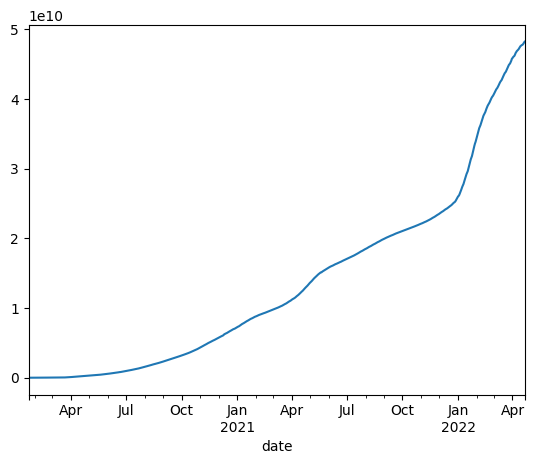

In [17]:
# make a covid plot over time
airports_gdf_cov.groupby("date")["Covid confirmed cases"].sum().plot()

In [18]:
airports_gdf_cov.shape

(6655847, 8)

In [19]:
# get only 2021 年 7月 到8月的数据
airports_gdf_cov = airports_gdf_cov[airports_gdf_cov["date"] >= "2021-07-01"]
airports_gdf_cov = airports_gdf_cov[airports_gdf_cov["date"] <= "2021-07-31"]

In [20]:
airports_gdf_cov.shape

(251317, 8)

<Axes: xlabel='date'>

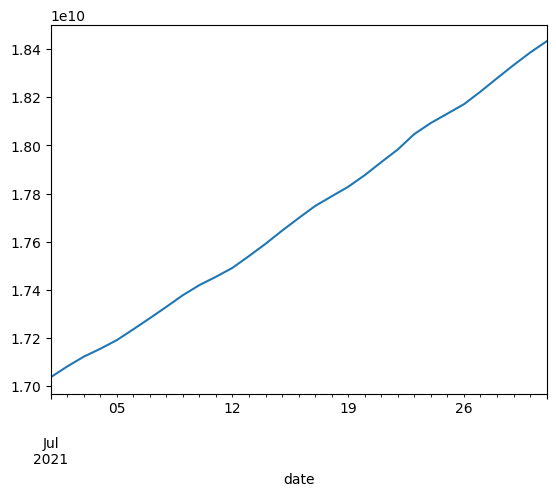

In [21]:
airports_gdf_cov.groupby("date")["Covid confirmed cases"].sum().plot()

In [22]:
# map the date to from 2030-01-01 to 2030-01-31
airports_gdf_cov["date"] = airports_gdf_cov["date"].apply(lambda x: x.strftime("%Y-%m-%d"))
airports_gdf_cov["date"] = airports_gdf_cov["date"].apply(lambda x: x.replace("2021", "2030"))
airports_gdf_cov["date"] = airports_gdf_cov["date"].apply(lambda x: x.replace("-07-", "-01-"))

airports_gdf_cov["date"] = pd.to_datetime(airports_gdf_cov["date"])


<Axes: xlabel='date'>

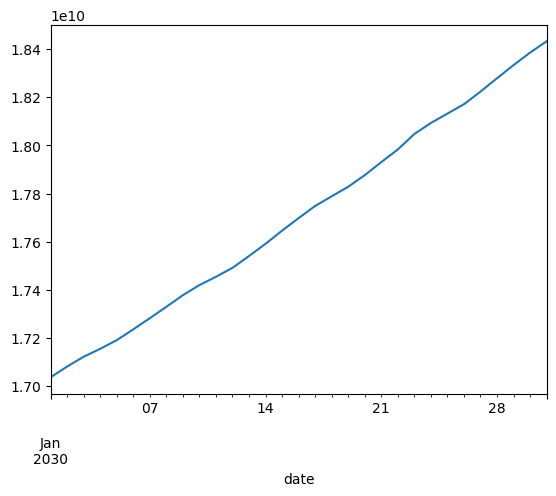

In [23]:
airports_gdf_cov.groupby("date")["Covid confirmed cases"].sum().plot()

## monkeypox

In [35]:
import pandas as pd
monkeypox = pd.read_csv('./monkeypox.csv')
# replace the country name in monkeypox from Czechia to Czech Republic
monkeypox["CountryExp"].replace({"Czechia":"Czech Republic"}, inplace=True)
print(monkeypox.shape)
# merge the monkeypox data to world basemap
monkeypox = world_basemap.merge(monkeypox, left_on = "CNTRY_NAME", right_on = "CountryExp", how="right")
monkeypox = monkeypox[['DateRep', 'CountryExp',
        'ConfCases', 'geometry']]
monkeypox.rename(columns={"DateRep":"date", "CountryExp":"country",  "ConfCases":"Monkeypox confirmed cases"}, inplace=True)
monkeypox["date"] = pd.to_datetime(monkeypox["date"])
monkeypox.drop(columns=["geometry"], inplace=True)
monkeypox.head()

(7308, 5)


,date,country,Monkeypox confirmed cases
0,2022-04-22,Austria,0
1,2022-04-22,Belgium,0
2,2022-04-22,Bulgaria,0
3,2022-04-22,Croatia,0
4,2022-04-22,Cyprus,0


<Axes: xlabel='date'>

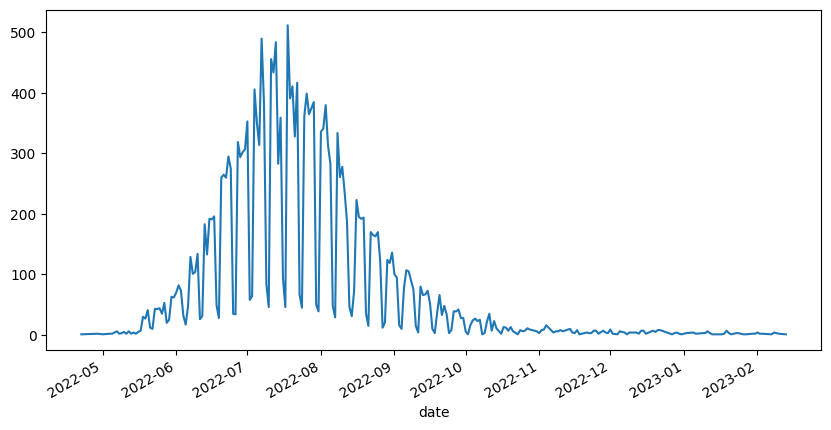

In [36]:
# make plot of monkeypox over time
monkeypox.groupby("date")["Monkeypox confirmed cases"].sum().plot(figsize=(10, 5))


In [37]:
# get July 2022 data
monkeypox = monkeypox[monkeypox["date"] >= "2022-05-01"]
monkeypox = monkeypox[monkeypox["date"] <= "2022-05-31"]
monkeypox.shape

(812, 3)

<Axes: xlabel='date'>

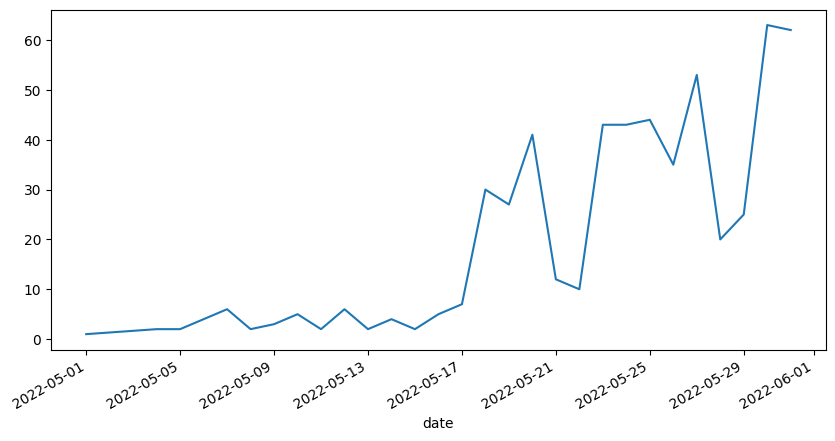

In [38]:
# plot
monkeypox.groupby("date")["Monkeypox confirmed cases"].sum().plot(figsize=(10, 5))

In [39]:
# change it to 2030

monkeypox["date"] = monkeypox["date"].apply(lambda x: x.strftime("%Y-%m-%d"))
monkeypox["date"] = monkeypox["date"].apply(lambda x: x.replace("2022", "2030"))
monkeypox["date"] = monkeypox["date"].apply(lambda x: x.replace("-05-", "-01-"))

monkeypox["date"] = pd.to_datetime(monkeypox["date"])

<Axes: xlabel='date'>

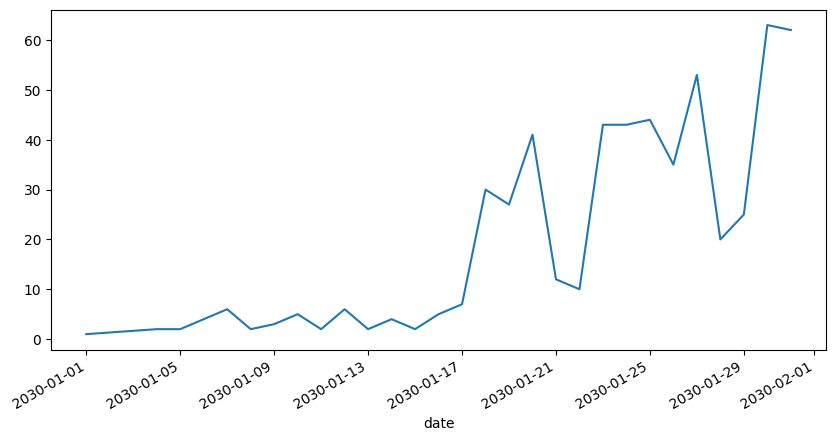

In [40]:
# make plot

monkeypox.groupby("date")["Monkeypox confirmed cases"].sum().plot(figsize=(10, 5))

Should keep the timeline the same

## join the monkeypox data with the airports data with time and country


In [42]:
airports_monkeypox_covid = pd.merge(airports_gdf_cov, monkeypox, on=['date', 'country'], how='left', suffixes=('_covid', '_monkeypox'))
# airports_monkeypox_covid.drop(columns=["geometry"], inplace=True)
airports_monkeypox_covid.head()


,name,city,country,longitude,latitude,airportId,date,Covid confirmed cases,Monkeypox confirmed cases
0,Goroka,Goroka,Papua New Guinea,145.391881,-6.081689,1,2030-01-01,17098.0,NaN
1,Madang,Madang,Papua New Guinea,145.788700,-5.207083,2,2030-01-01,17098.0,NaN
2,Mount Hagen,Mount Hagen,Papua New Guinea,144.295861,-5.826789,3,2030-01-01,17098.0,NaN
3,Nadzab,Nadzab,Papua New Guinea,146.726242,-6.569828,4,2030-01-01,17098.0,NaN
4,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,147.220050,-9.443383,5,2030-01-01,17098.0,NaN


😀

/var/folders/f0/xl6nrz1n02bd52xdnrwb70w80000gn/T/ipykernel_66164/1752375040.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  "Monkeypox confirmed cases"]].sum().plot(


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

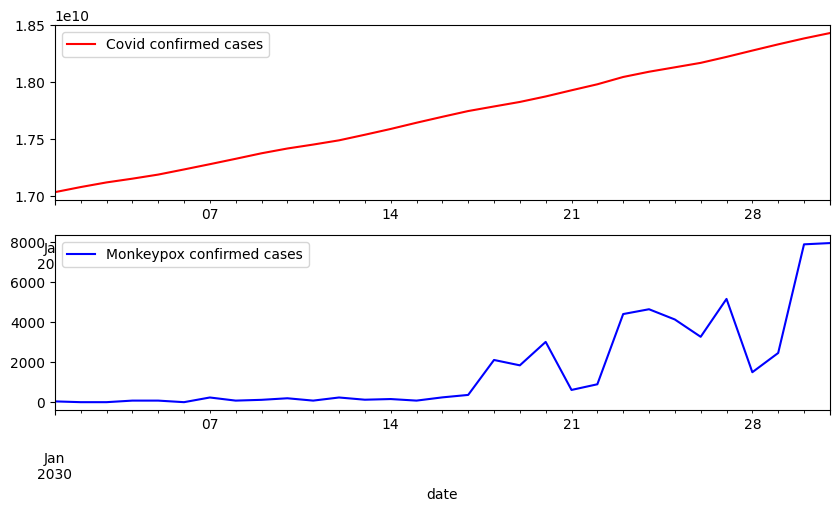

In [51]:
# make plot of two 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
airports_monkeypox_covid.groupby("date")[["Covid confirmed cases",
                                         "Monkeypox confirmed cases"]].sum().plot(
    ax=ax, color=["red", "blue"], logy=False, subplots=True)


In [45]:
for item in monkeypox["country"].unique():
    if item not in airports_gdf_cov.country.unique():
        print(item)

In [114]:
# for irem in world_basemap.CNTRY_NAME.unique():
#     if "Czech" in irem:
#         print(irem)

Czech Republic


In [52]:
airports_monkeypox_covid.to_csv("airports_monkeypox_covid.csv", index=False)

## Airlines

In [53]:
airlines = pd.DataFrame(flights_json["airlines"], columns = flights_json["airlineFields"])
airlines["airlineId"] = range(1, len(airlines) + 1)
airlines.head()

,name,country,airlineId
0,Air France,France,1
1,easyJet,United Kingdom,2
2,Southwest Airlines,United States,3
3,China Eastern Airlines,China,4
4,Air China,China,5


## Routes

This routes shuold also has time atributte, routes could separate with the airports

In [54]:
routes = pd.DataFrame(flights_json["routes"], columns = ['airline', 'src', 'dst'])
routes["routeId"] = range(1, len(routes) + 1)


In [66]:
pd.DateOffset(days=1)

<DateOffset: days=1>

In [72]:
routes.shape

(17164, 5)

In [75]:
start_date = airports_monkeypox_covid.date.min()
routes_all_date = []
while  start_date <= airports_monkeypox_covid.date.max():
    # print(start_date)
    routes = routes.copy()
    routes["date"] = start_date
    routes_all_date.append(routes)
    start_date = start_date + pd.DateOffset(days=1)

routes_all_date = pd.concat(routes_all_date)

# shuold also merge on the same date 


In [76]:
routes_all_date.shape

(532084, 5)

In [78]:
# routes_all_date.date.unique()

In [79]:
routes_all_date.date.min(),routes_all_date.date.max()

(Timestamp('2030-01-01 00:00:00'), Timestamp('2030-01-31 00:00:00'))

In [81]:
routes_all_date = routes_all_date.merge(airports_monkeypox_covid, left_on = ['src','date'], right_on = ['airportId','date'], suffixes = ['_', '_src'])
routes_all_date = routes_all_date.merge(airports_monkeypox_covid, left_on = ['dst','date'], right_on = ['airportId','date'], suffixes = ['_src', '_dst'])
routes_all_date = routes_all_date.merge(airlines, left_on = 'airline', right_on = 'airlineId', suffixes = ['', '_airline'], how="left")
routes_all_date.rename(columns={"name": "airline_name", "country":"airline_country"}, inplace=True)
# filter dst in China
routes_all_date["flow count"] = 1
routes_all_date = routes_all_date[routes_all_date['country_dst'] == 'China']
routes_all_date.loc[routes_all_date["routeId"] == 10012, "flow count"] = 50
routes_all_date.loc[routes_all_date["routeId"] == 9090, "flow count"] = 60
routes_all_date.loc[routes_all_date["routeId"] == 4033, "flow count"] = 30
routes_all_date.loc[routes_all_date["routeId"] == 3987, "flow count"] = 60
routes_all_date.loc[routes_all_date["routeId"] == 3649, "flow count"] = 11
routes_all_date = routes_all_date[routes_all_date["country_src"] != "China"]
routes_all_date.rename(columns={"longitude_src": "src_lng", 
        "latitude_src": "src_lat", "longitude_dst": "dst_lng", "latitude_dst": "dst_lat"}, inplace=True)
routes_all_date.head()

,airline,src,dst,routeId,date,name_src,city_src,country_src,src_lng,src_lat,...,country_dst,dst_lng,dst_lat,airportId_dst,Covid confirmed cases_dst,Monkeypox confirmed cases_dst,airline_name,airline_country,airlineId,flow count
6415,4,1965,3307,2357,2030-01-01,La Tontouta,Noumea,New Caledonia,166.212972,-22.014553,...,China,121.5386,38.965667,3307,113614.0,NaN,China Eastern Airlines,China,4,1
6416,5,575,3307,3620,2030-01-01,Mount Pleasant,Mount Pleasant,Falkland Islands,-58.447222,-51.822777,...,China,121.5386,38.965667,3307,113614.0,NaN,Air China,China,5,1
6417,3,575,3307,9518,2030-01-01,Mount Pleasant,Mount Pleasant,Falkland Islands,-58.447222,-51.822777,...,China,121.5386,38.965667,3307,113614.0,NaN,Southwest Airlines,United States,3,1
6418,3,3786,3307,9532,2030-01-01,Robins Afb,Macon,United States,-83.591850,32.640144,...,China,121.5386,38.965667,3307,113614.0,NaN,Southwest Airlines,United States,3,1
6419,4,1358,3307,2427,2030-01-01,Creil,Creil,France,2.519139,49.253547,...,China,121.5386,38.965667,3307,113614.0,NaN,China Eastern Airlines,China,4,1


<Axes: xlabel='date'>

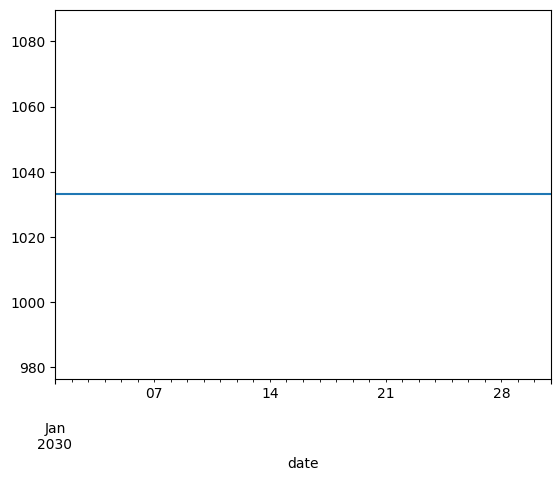

In [82]:
routes_all_date.groupby("date")["flow count"].sum().plot()

In [83]:
routes_all_date["date_str"] = routes_all_date["date"].dt.strftime('%Y-%m-%d %H:%M:%S')
routes_all_date.head()

,airline,src,dst,routeId,date,name_src,city_src,country_src,src_lng,src_lat,...,dst_lng,dst_lat,airportId_dst,Covid confirmed cases_dst,Monkeypox confirmed cases_dst,airline_name,airline_country,airlineId,flow count,date_str
6415,4,1965,3307,2357,2030-01-01,La Tontouta,Noumea,New Caledonia,166.212972,-22.014553,...,121.5386,38.965667,3307,113614.0,NaN,China Eastern Airlines,China,4,1,2030-01-01 00:00:00
6416,5,575,3307,3620,2030-01-01,Mount Pleasant,Mount Pleasant,Falkland Islands,-58.447222,-51.822777,...,121.5386,38.965667,3307,113614.0,NaN,Air China,China,5,1,2030-01-01 00:00:00
6417,3,575,3307,9518,2030-01-01,Mount Pleasant,Mount Pleasant,Falkland Islands,-58.447222,-51.822777,...,121.5386,38.965667,3307,113614.0,NaN,Southwest Airlines,United States,3,1,2030-01-01 00:00:00
6418,3,3786,3307,9532,2030-01-01,Robins Afb,Macon,United States,-83.591850,32.640144,...,121.5386,38.965667,3307,113614.0,NaN,Southwest Airlines,United States,3,1,2030-01-01 00:00:00
6419,4,1358,3307,2427,2030-01-01,Creil,Creil,France,2.519139,49.253547,...,121.5386,38.965667,3307,113614.0,NaN,China Eastern Airlines,China,4,1,2030-01-01 00:00:00


In [84]:
routes_all_date.to_csv("flights.csv", index=False)

In [85]:
import pandas as pd
routes = pd.read_csv("flights.csv")
routes.head()

,airline,src,dst,routeId,date,name_src,city_src,country_src,src_lng,src_lat,...,dst_lng,dst_lat,airportId_dst,Covid confirmed cases_dst,Monkeypox confirmed cases_dst,airline_name,airline_country,airlineId,flow count,date_str
0,4,1965,3307,2357,2030-01-01,La Tontouta,Noumea,New Caledonia,166.212972,-22.014553,...,121.5386,38.965667,3307,113614.0,NaN,China Eastern Airlines,China,4,1,2030-01-01 00:00:00
1,5,575,3307,3620,2030-01-01,Mount Pleasant,Mount Pleasant,Falkland Islands,-58.447222,-51.822777,...,121.5386,38.965667,3307,113614.0,NaN,Air China,China,5,1,2030-01-01 00:00:00
2,3,575,3307,9518,2030-01-01,Mount Pleasant,Mount Pleasant,Falkland Islands,-58.447222,-51.822777,...,121.5386,38.965667,3307,113614.0,NaN,Southwest Airlines,United States,3,1,2030-01-01 00:00:00
3,3,3786,3307,9532,2030-01-01,Robins Afb,Macon,United States,-83.591850,32.640144,...,121.5386,38.965667,3307,113614.0,NaN,Southwest Airlines,United States,3,1,2030-01-01 00:00:00
4,4,1358,3307,2427,2030-01-01,Creil,Creil,France,2.519139,49.253547,...,121.5386,38.965667,3307,113614.0,NaN,China Eastern Airlines,China,4,1,2030-01-01 00:00:00


In [86]:
routes.columns

Index(['airline', 'src', 'dst', 'routeId', 'date', 'name_src', 'city_src',
       'country_src', 'src_lng', 'src_lat', 'airportId_src',
       'Covid confirmed cases_src', 'Monkeypox confirmed cases_src',
       'name_dst', 'city_dst', 'country_dst', 'dst_lng', 'dst_lat',
       'airportId_dst', 'Covid confirmed cases_dst',
       'Monkeypox confirmed cases_dst', 'airline_name', 'airline_country',
       'airlineId', 'flow count', 'date_str'],
      dtype='object')

In [168]:
# 看起来只要提前设置好了config，就可以在不同的数据集上使用同一个config
# 这样其实可以直接使用kepler.gl的config


## read the manuly edited data

In [1]:
import pandas as pd
df = pd.read_csv("flights edited.csv")
# add a random number (between 0-5) to the flow count column
import numpy as np
df["flow count"] = df["flow count"] + np.random.randint(0, 5, df.shape[0])

df.head()

,airline,src,dst,routeId,date,name_src,city_src,country_src,src_lng,src_lat,...,dst_lng,dst_lat,airportId_dst,Covid confirmed cases_dst,Monkeypox confirmed cases_dst,airline_name,airline_country,airlineId,flow count,date_str
0,4,1965,3307,2357,2030-01-01,La Tontouta,Noumea,New Caledonia,166.212972,-22.014553,...,121.5386,38.965667,3307,113614.0,NaN,China Eastern Airlines,China,4,4,2030-01-01 00:00:00
1,5,575,3307,3620,2030-01-01,Mount Pleasant,Mount Pleasant,Falkland Islands,-58.447222,-51.822777,...,121.5386,38.965667,3307,113614.0,NaN,Air China,China,5,2,2030-01-01 00:00:00
2,3,575,3307,9518,2030-01-01,Mount Pleasant,Mount Pleasant,Falkland Islands,-58.447222,-51.822777,...,121.5386,38.965667,3307,113614.0,NaN,Southwest Airlines,United States,3,4,2030-01-01 00:00:00
3,3,3786,3307,9532,2030-01-01,Robins Afb,Macon,United States,-83.591850,32.640144,...,121.5386,38.965667,3307,113614.0,NaN,Southwest Airlines,United States,3,5,2030-01-01 00:00:00
4,4,1358,3307,2427,2030-01-01,Creil,Creil,France,2.519139,49.253547,...,121.5386,38.965667,3307,113614.0,NaN,China Eastern Airlines,China,4,3,2030-01-01 00:00:00


In [3]:
df.columns

Index(['airline', 'src', 'dst', 'routeId', 'date', 'name_src', 'city_src',
       'country_src', 'src_lng', 'src_lat', 'airportId_src',
       'Covid confirmed cases_src', 'Monkeypox confirmed cases_src',
       'name_dst', 'city_dst', 'country_dst', 'dst_lng', 'dst_lat',
       'airportId_dst', 'Covid confirmed cases_dst',
       'Monkeypox confirmed cases_dst', 'airline_name', 'airline_country',
       'airlineId', 'flow count', 'date_str'],
      dtype='object')

In [3]:
from keplergl import KeplerGl
map_1 = KeplerGl(height=600, width=800)
map_1.add_data(data=df, name="flights")
#  save the map as html
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/opt/homebrew/Caskroom/mambaforge/base/envs/geo/lib/python3.11/site-packages/jupyter_client/session.py:719: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


KeplerGl(data={'flights': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

<Axes: xlabel='date'>

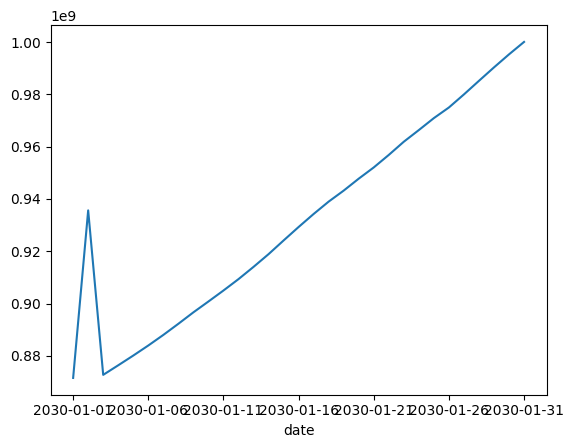

In [93]:
# for each date, add a normal distribution to the covid confirmed cases

df.groupby("date")["Covid confirmed cases_src"].sum().plot()
